In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
np.sin(27)

0.956375928404503

In [3]:
np.sin([1, 2, 3])

array([0.84147098, 0.90929743, 0.14112001])

NumPy is fast:

In [12]:
# Create two arrays with 10,000,000 random elements between 0 and 1 and multiply them 

v1 = np.random.rand(10**7)
v2 = np.random.rand(10**7)
%time v1 * v2

Wall time: 20.4 ms


array([0.01587187, 0.48840803, 0.42931743, ..., 0.65603731, 0.73100547,
       0.48769479])

We can perform a dot operator as follows:

In [18]:
mat = np.random.randn(9).reshape((3,3))

print(mat)
mat @ mat

[[-0.7642755   0.11564602  0.55555981]
 [-0.43122518 -1.00603432  1.5934615 ]
 [ 0.98404784  0.50754441  0.56366946]]


array([[ 1.080945  ,  0.07724198,  0.07282883],
       [ 2.33144451,  1.77098804, -0.94446275],
       [-0.41627187, -0.11071859,  1.67317316]])

Transpose a matrix:

In [19]:
print(mat.T)

[[-0.7642755  -0.43122518  0.98404784]
 [ 0.11564602 -1.00603432  0.50754441]
 [ 0.55555981  1.5934615   0.56366946]]


## Boolean Indexing

In [26]:
arr = np.random.randn(10)
arr[arr > 0.7]

array([1.09979733, 0.96375687, 1.52800982])

In [23]:
arr[arr > 5]

array([6, 7, 8, 9])

Multiple conditions

In [34]:
arr = np.arange(10)
arr[(arr >= 3) & (arr <= 8)]

array([3, 4, 5, 6, 7, 8])

In [35]:
arr[~(arr > 5)]

array([0, 1, 2, 3, 4, 5])

Find outliers with boolen indexing:

In [44]:
values = np.random.normal(1, 10, 1000)

values[30] = 1312
values[743] = -984

mask = np.abs(values - values.mean()) >  ( 2 * values.std())
values[mask]

array([1312., -984.])

In [45]:
# Or, we can normalize outliers
values[mask] = values.mean()

## Broadcasting 

In [47]:
arr = np.arange(3)
arr + 3

array([3, 4, 5])

In [54]:
a = np.random.rand(9).reshape(3,3)
b = np.random.rand(9).reshape(3,3)

print('a:{} \n\n b:{}'.format(a, b))
a + b

a:[[0.17837631 0.1276847  0.58626061]
 [0.66360467 0.02330624 0.16952452]
 [0.79083834 0.20546998 0.05698719]] 

 b:[[0.91690177 0.03511282 0.21170021]
 [0.68931253 0.21020221 0.03709635]
 [0.49515582 0.70802607 0.85626597]]


array([[1.09527808, 0.16279752, 0.79796082],
       [1.3529172 , 0.23350845, 0.20662087],
       [1.28599416, 0.91349605, 0.91325315]])

Note that the operation will be expanded on all elements if the dimensions of arrays are not the same.

In [58]:
v1 = np.arange(3)
v2 = np.arange(3).reshape((3,1))

v1 + v2

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Array Operations

In [69]:
arr = np.random.randint(0, 9, (3,2))
arr

array([[3, 0],
       [8, 2],
       [8, 1]])

In [70]:
# Transpose
arr.T

array([[3, 8, 8],
       [0, 2, 1]])

In [73]:
# ask if there is any element which evaluates the true
arr.any()

True

In [74]:
# # ask if all elements evaluate the true. As we have zero, this will return False
arr.all()

False

In [75]:
# multiply all elements of the array one by one 
arr.prod()

0

In [79]:
# run an operation on rows and columns 
row_sum = arr.sum(axis=1)
col_sum = arr.sum(axis=0)
print('row sum: {} \ncolumn sum: {}'.format(row_sum, col_sum))

row sum: [ 3 10  9] 
column sum: [19  3]


In [80]:
# similar to the list, we can make a copy of an array and make sure the original values are not changed
copy_arr = arr.copy()
copy_arr *= 0
copy_arr

array([[0, 0],
       [0, 0],
       [0, 0]])

In [81]:
arr

array([[3, 0],
       [8, 2],
       [8, 1]])

## Ufuncs

The following code will raise an error if the entry is a list as the function can only work with a number.

In [89]:
def my_func(n):
    if n < 0:
        return 0
    return n

my_func([-1,1])

TypeError: '<' not supported between instances of 'list' and 'int'

However, we can add a decorator that will vectorize the entry and make the function valid for lists, too.

In [93]:
@np.vectorize
def my_func(n):
    if n < 0:
        return 0
    return n

res = my_func([-1,1])
res

array([0, 1])

Ufuncs are also non-aware, meaning they can work even if there is any nan values included in the entry.

In [94]:
np.sin([90, np.nan, 180])

array([ 0.89399666,         nan, -0.80115264])

Draw a blue square around the flower in the image below. 

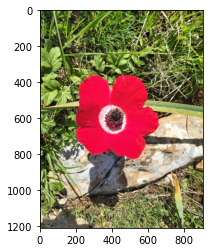

In [3]:
img = plt.imread('https://raw.githubusercontent.com/LinkedInLearning/python-scientific-stack-3006561/main/Ch02/challenge/flower.png')
img = img.copy()
plt.imshow(img)

In [5]:
top_left_x, top_left_y = 350, 190
bottom_right_x, bottom_right_y  = 850, 680
line_width = 30

color = [0, 0, 0xF0F8FF] #aliceblue

img[top_left_x:top_left_x + line_width, top_left_y:bottom_right_y] = color
img[bottom_left_x:bottom_left_x + line_width, top_left_y:bottom_right_y] = color

img[top_left_x:bottom_right_x, top_left_y-line_width:top_left_y] = color
img[top_left_x:bottom_right_x, bottom_right_y-line_width:bottom_right_y] = color

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


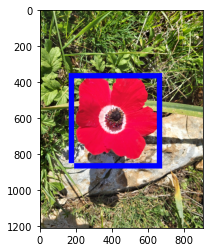

In [6]:
plt.imshow(img)

# pandas

Import the dataset of a jogging track.

In [103]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/python-scientific-stack-3006561/main/Ch03/03_02/track.csv', parse_dates=['time'])

In [104]:
df.head()

,time,lat,lng,height
0,2015-08-20 03:48:07.235,32.519585,35.015021,136.199997
1,2015-08-20 03:48:24.734,32.519606,35.014954,126.599998
2,2015-08-20 03:48:25.660,32.519612,35.014871,123.000000
3,2015-08-20 03:48:26.819,32.519654,35.014824,120.500000
4,2015-08-20 03:48:27.828,32.519689,35.014776,118.900002


Look at the data types of each column and check for null values.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    740 non-null    datetime64[ns]
 1   lat     740 non-null    float64       
 2   lng     740 non-null    float64       
 3   height  740 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 23.2 KB


In [106]:
df.time.isnull().any()

False

Basic stats about the columns.

In [107]:
df.describe()

,lat,lng,height
count,740.000000,740.000000,740.000000
mean,32.512191,35.015832,97.876892
std,0.002974,0.003665,11.985234
min,32.508092,35.009294,77.500000
25%,32.509432,35.012891,88.000000
50%,32.511454,35.015709,97.649998
75%,32.514143,35.018649,106.450001
max,32.519734,35.022774,136.199997


Note that df.loc works as a closed interval as opposed to the normal indexing in Pyton. 

In [108]:
df.loc[2:7, ['lat', 'lng']]

,lat,lng
2,32.519612,35.014871
3,32.519654,35.014824
4,32.519689,35.014776
5,32.519691,35.014704
6,32.519734,35.014657
7,32.519719,35.014563


Find the earliest and the latest date in the time column.

In [109]:
print('min time: {} \nmax time: {}'.format(min(df.time), max(df.time)))

min time: 2015-08-20 03:48:07.235000 
max time: 2015-08-20 04:20:42.329000


Retrieve the rows that are between 2015-08-20 03:55:00 and 2015-08-20 04:05:00.

In [118]:
df[('2015-08-20 03:55' <= df.time) & (df.time <='2015-08-20 04:05')]

,time,lat,lng,height
153,2015-08-20 03:55:01.904,32.513024,35.011538,90.699997
154,2015-08-20 03:55:02.695,32.513016,35.011510,91.000000
155,2015-08-20 03:55:05.766,32.512991,35.011432,90.000000
156,2015-08-20 03:55:06.696,32.512982,35.011409,88.900002
157,2015-08-20 03:55:10.766,32.512965,35.011310,88.000000
...,...,...,...,...
361,2015-08-20 04:04:49.819,32.508560,35.016969,81.699997
362,2015-08-20 04:04:50.751,32.508565,35.016995,81.699997
363,2015-08-20 04:04:54.827,32.508588,35.017093,81.500000
364,2015-08-20 04:04:55.741,32.508594,35.017118,81.300003


##### Calculate the average running speed per hour.

In [122]:
lat_km = 92
lng_km = 111

def distance(lat1, lat2, lng1, lng2):
    # For simplicity, let's use Euclidean distance
    lat_delta = (lat1- lat2) * lat_km
    lng_delta = (lng1 - lng2) * lng_km
    return np.hypot(lat_delta, lng_delta)
    

Use df.Series.shift to apply the distance function to the whole lat and lng columns.

In [148]:
dist = distance(df.lat, df.lat.shift(),  df.lng, df.lng.shift())
dist

0           NaN
1      0.007684
2      0.009230
3      0.006492
4      0.006225
         ...   
735    0.011265
736    0.003811
737    0.009698
738    0.001948
739    0.007050
Length: 740, dtype: float64

In [149]:
dist_total = dist.sum()
dist_total

4.693669332948701

Total running distance is about 4.7 km, which is a reasonable value. Now calculate the total running time.

In [144]:
df.time.diff()

0                        NaT
1     0 days 00:00:17.499000
2     0 days 00:00:00.926000
3     0 days 00:00:01.159000
4     0 days 00:00:01.009000
               ...          
735   0 days 00:00:03.147000
736   0 days 00:00:00.941000
737   0 days 00:00:02.940000
738   0 days 00:00:01.131000
739   0 days 00:00:08.335000
Name: time, Length: 740, dtype: timedelta64[ns]

In [151]:
running_time = df.time.diff()
running_time.sum()

Timedelta('0 days 00:32:35.094000')

In [154]:
running_time_hour = running_time / pd.Timedelta(1, 'hour')
speed = dist / (running_time_hour)
speed

0            NaN
1       1.580769
2      35.881510
3      20.165334
4      22.211645
         ...    
735    12.886427
736    14.578495
737    11.875200
738     6.201891
739     3.044985
Length: 740, dtype: float64

Note that in some instance the speed is as high as 35 km/h which is way too fast for an average person. This error can be due to gpa glitches, and the Euclidean distance. <br>
Plot the boxplot of speed series to see how speed values are distributed and spot the outliers.

In [158]:
speed.describe()

count    739.000000
mean       9.580445
std        2.937204
min        1.580769
25%        7.902295
50%        9.604717
75%       10.880122
max       38.085958
dtype: float64

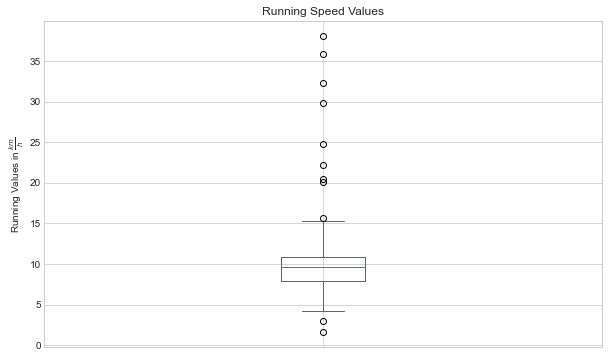

In [170]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-whitegrid')

speed.name = ''
ax = speed.plot.box(title='Running Speed Values')
ax.set_ylabel(r'Running Values in $\frac{km}{h}$ ');

##### NYC Yellow Taxi Mean Speed in January, 2022 <br>
Import Yellow Taxi Trip Records in NYC for January, 2022. The dataset is from https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page.

In [183]:
df = pd.read_parquet('C:/Users/Lenovo/Desktop/datasets/yellow_tripdata_2022-01.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [176]:
len(df)

2463931

We have around 2.5 millions of rows. How many different vendorid does the dataset have?

In [177]:
df.VendorID.nunique()

4

First, check for the rows whose dropoff time is earlier than pickup time, and then drop them if any.

In [221]:
mask = df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']
df = df[~mask]

Calculate the trip time for each row.

In [222]:
trip_time = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
trip_time

0         0 days 00:17:49
1         0 days 00:08:24
2         0 days 00:08:58
3         0 days 00:10:02
4         0 days 00:37:32
                ...      
2463926   0 days 00:05:58
2463927   0 days 00:10:39
2463928   0 days 00:11:00
2463929   0 days 00:12:03
2463930   0 days 00:27:00
Length: 2462578, dtype: timedelta64[ns]

In [228]:
trip_time.describe()

count                      2462578
mean     0 days 00:14:13.298877030
std      0 days 00:46:24.268868391
min                0 days 00:00:00
25%                0 days 00:06:19
50%                0 days 00:10:11
75%                0 days 00:16:10
max                5 days 21:53:11
dtype: object

Note that the minimum value will raise zero division error, drop all the rows whose trip time is 0.

In [229]:
neg_days = trip_time == '0 days'
trip_time[neg_days]

1760      0 days
3156      0 days
4726      0 days
5612      0 days
5613      0 days
           ...  
2462474   0 days
2463335   0 days
2463423   0 days
2463528   0 days
2463542   0 days
Length: 1096, dtype: timedelta64[ns]

In [230]:
trip_time = trip_time[~neg_days]

Calculate the average speed for each trip.

In [231]:
trip_hour = trip_time / pd.Timedelta(1, 'hour')
speed = df.trip_distance / trip_hour
speed

0          12.797007
1          15.000000
2           6.490706
3           6.518272
4           6.873890
             ...    
2463926    13.273743
2463927    23.605634
2463928    11.454545
2463929    14.539419
2463930    19.866667
Length: 2462578, dtype: float64

Finally, we can show the average speed for all the trips.

In [232]:
speed.mean()

33.04191954805846